<a href="https://colab.research.google.com/github/john-imperato/SIP-Code-Sample/blob/main/SIP_Denali_CodeSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting Assignment - Air Quality in New Delhi, India

1. How does air quality vary over time in New Delhi? Are there seasonal patterns?
2. How does air quality vary with temperature?

# Data Documentation

## Air Quality Data
* Air quality data is from AirNow, a partnership across many US federal agencies, and the US's official source for air quality data globally.


* AQI data is from the US embassy in New Delhi from the "Historical" tab at [this link](https://www.airnow.gov/international/us-embassies-and-consulates/#India$New_Delhi)

* The data includes hourly measures of particulate matter (PM2.5), as well as the associated [Air Quality Index](https://www.airnow.gov/aqi/aqi-basics/) (AQI) and Air Quality Index Category.


## Temperature Data
* Global Historical Climatology from [NOAA](https://www.ncdc.noaa.gov/cdo-web/search) - daily air temperature in New Delhi.
* 'Daily Summaries' data for New Delhi City in °F for 2015-2020.
* Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeal, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [Aug 2021]

## AQI data

In [42]:
import pandas as pd
import numpy as np
from plotnine import *


AQIlinks =['https://dosairnowdata.org/dos/historical/NewDelhi/2015/NewDelhi_PM2.5_2015_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2016/NewDelhi_PM2.5_2016_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2017/NewDelhi_PM2.5_2017_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2018/NewDelhi_PM2.5_2018_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2019/NewDelhi_PM2.5_2019_YTD.csv',
       'https://dosairnowdata.org/dos/historical/NewDelhi/2020/NewDelhi_PM2.5_2020_YTD.csv']

dfs = [pd.read_csv(i) for i in AQIlinks]

df = pd.concat(dfs)

df.head()


,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,New Delhi,PM2.5 - Principal,2015-01-01 01:00 AM,2015,1,1,1,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
1,New Delhi,PM2.5 - Principal,2015-01-01 02:00 AM,2015,1,1,2,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
2,New Delhi,PM2.5 - Principal,2015-01-01 03:00 AM,2015,1,1,3,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
3,New Delhi,PM2.5 - Principal,2015-01-01 04:00 AM,2015,1,1,4,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing
4,New Delhi,PM2.5 - Principal,2015-01-01 05:00 AM,2015,1,1,5,-999.0,-999,NaN,-999.0,UG/M3,1 Hr,Missing


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51606 entries, 0 to 8782
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           51606 non-null  object 
 1   Parameter      51606 non-null  object 
 2   Date (LT)      51606 non-null  object 
 3   Year           51606 non-null  int64  
 4   Month          51606 non-null  int64  
 5   Day            51606 non-null  int64  
 6   Hour           51606 non-null  int64  
 7   NowCast Conc.  51606 non-null  float64
 8   AQI            51606 non-null  int64  
 9   AQI Category   48758 non-null  object 
 10  Raw Conc.      51606 non-null  float64
 11  Conc. Unit     51606 non-null  object 
 12  Duration       51606 non-null  object 
 13  QC Name        51606 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 7.9+ MB


In [44]:
df.describe()

,Year,Month,Day,Hour,NowCast Conc.,AQI,Raw Conc.
count,51606.000000,51606.000000,51606.000000,51606.000000,51606.000000,51606.000000,51606.000000
mean,2017.473627,6.583033,15.737104,11.501085,44.622540,105.411231,73.562623
std,1.713099,3.440030,8.826880,6.921447,272.007072,281.946401,319.284588
min,2015.000000,1.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000
25%,2016.000000,4.000000,8.000000,6.000000,33.500000,96.000000,33.000000
50%,2017.000000,7.000000,16.000000,12.000000,63.300000,155.000000,64.000000
75%,2019.000000,10.000000,23.000000,17.750000,133.100000,191.000000,136.000000
max,2021.000000,12.000000,31.000000,23.000000,1546.900000,1191.000000,1985.000000


In [45]:
df.Site.value_counts()

New Delhi    51606
Name: Site, dtype: int64

In [46]:
df.Parameter.value_counts()

PM2.5 - Principal    51606
Name: Parameter, dtype: int64

In [47]:
df['AQI Category'].value_counts()

Unhealthy                         17822
Moderate                          10188
Unhealthy for Sensitive Groups     8953
Very Unhealthy                     6628
Hazardous                          4296
Good                                871
Name: AQI Category, dtype: int64

In [48]:
df['Conc. Unit'].value_counts()

UG/M3    51606
Name: Conc. Unit, dtype: int64

In [49]:
df.Duration.value_counts()

1 Hr    51606
Name: Duration, dtype: int64

In [50]:
df['QC Name'].value_counts()

Valid      48451
Missing     2366
Invalid      788
Suspect        1
Name: QC Name, dtype: int64

In [51]:
# Check for duplicated rows

df.duplicated().sum()

0

Axes(0.125,0.11;0.775x0.77)


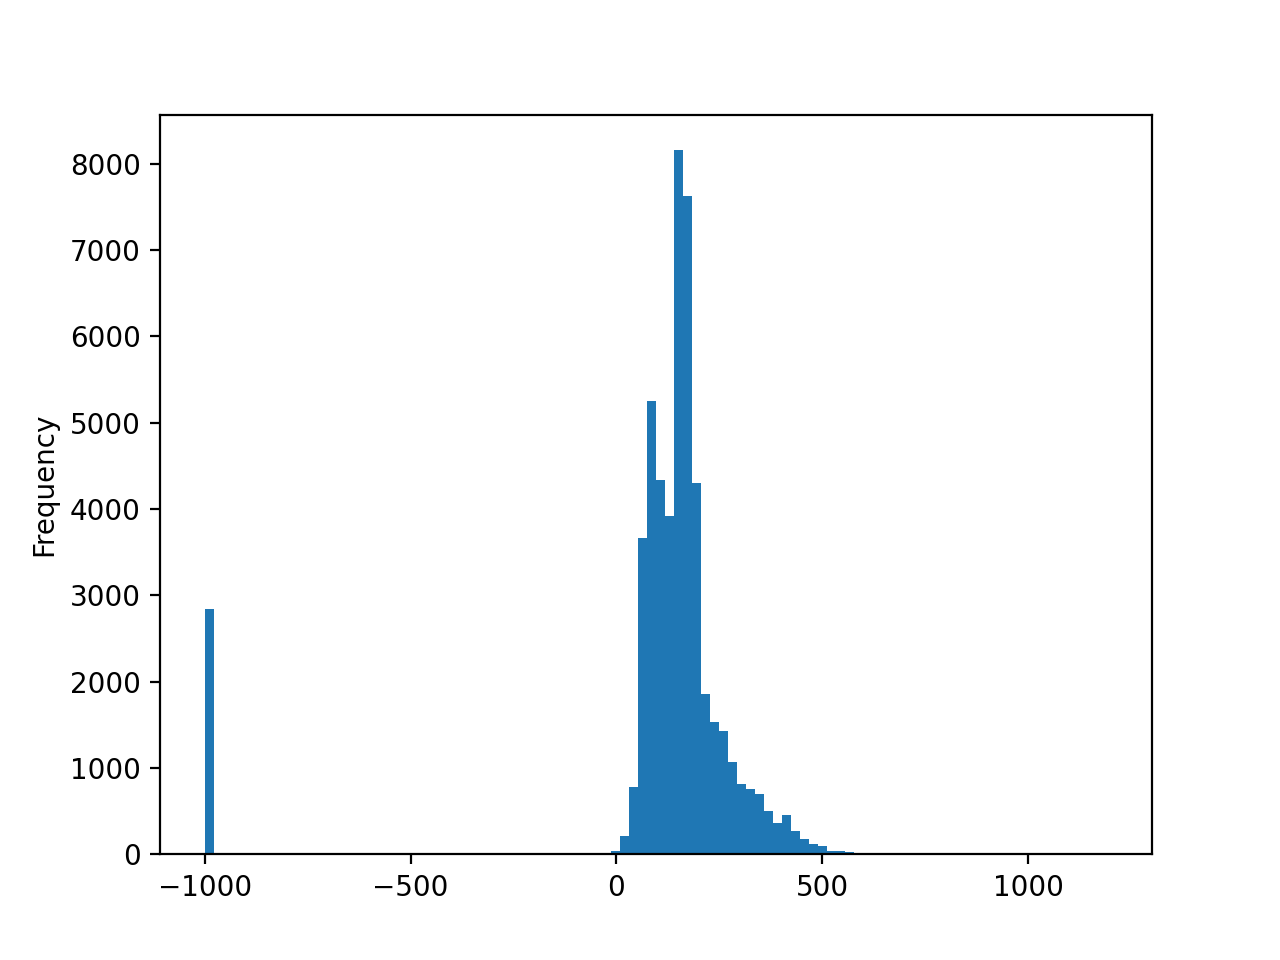

In [52]:
# Quick visual orientation

print(df.AQI.plot.hist(bins=100))

### Data cleaning to-do's

1.   Replace -999 values with NaN
2.   Filter for non-missing values



In [53]:
# Replace -999 values with NaN

df['AQI'] = df.AQI.replace(-999, np.nan)
df['NowCast Conc.'] = df['NowCast Conc.'].replace(-999.0, np.nan)
df['Raw Conc.'] = df['Raw Conc.'].replace(-999.0, np.nan)

In [54]:
# Filter for non-missing values

df_clean = df.dropna(subset='AQI')

## Time Series Plot

In [55]:
# Cast date variable as datetime data type in new column

df_clean['Date'] = pd.to_datetime(df_clean['Date (LT)'])

<ipython-input-55-0d27c8443842>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


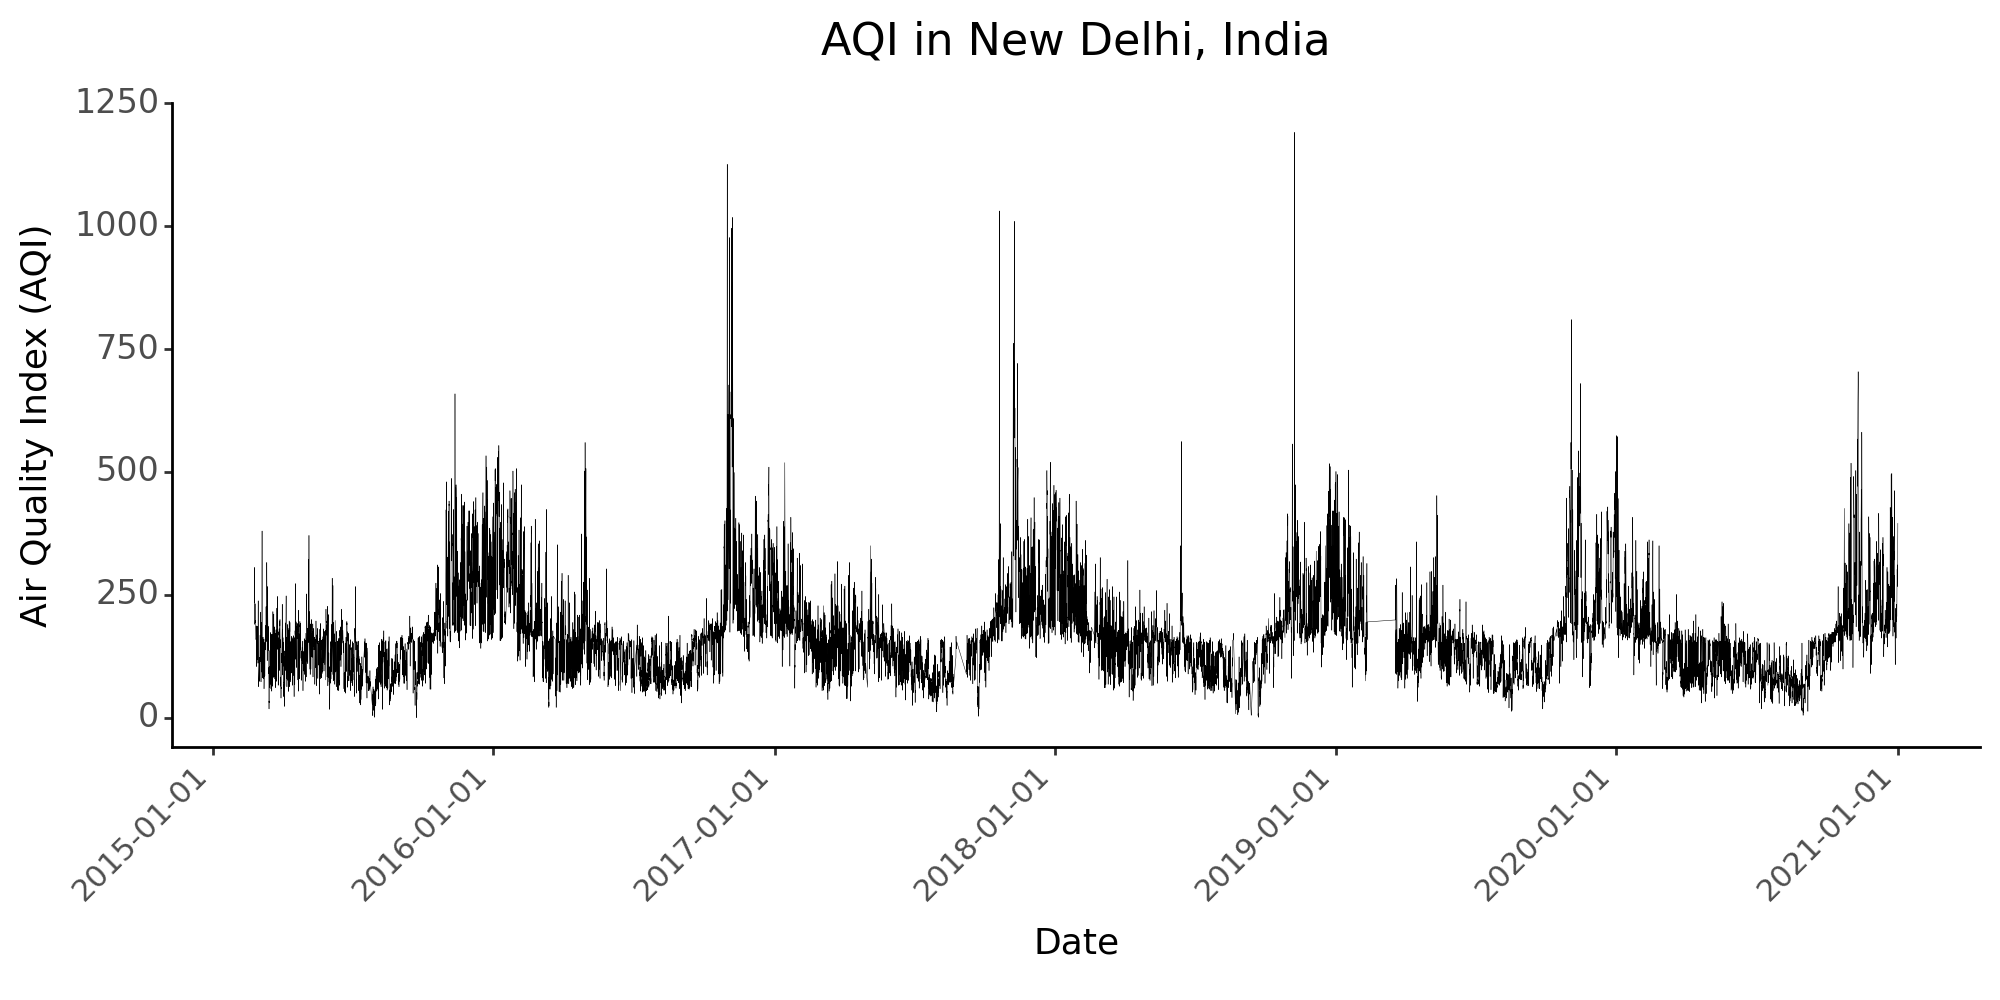

In [56]:
# Time series plot

figure_size = (10, 5)

TimeSeriesPlot = (ggplot(df_clean, aes(x='Date', y='AQI'))
  + geom_line(size=0.1)
  + ggtitle('AQI in New Delhi, India')
  + ylab("Air Quality Index (AQI)")
  + theme_classic()
  + theme(text=element_text(size=12),
          axis_text_x=element_text(angle=45, hjust=1, size=11),
          axis_text_y=element_text(size=12),
          plot_title=element_text(size=16, ha='center'),
          axis_title=element_text(size=13),
          figure_size = (10, 5))
  + scale_x_date()
  )

print(TimeSeriesPlot)

* Air quality in New Delhi seems to follow a seasonal cycle. AQI peaks some time during the northern hemisphere Winter months of December-January-February.

# Temperature Data

In [70]:
df_temp = pd.read_csv('https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/noaa_new_delhi_temp_15_20.csv')

df_temp.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN
0,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-01,58,NaN,NaN
1,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-02,58,NaN,NaN
2,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-03,57,NaN,NaN
3,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-04,56,NaN,NaN
4,IN022023000,"NEW DELHI PALAM, IN",28.567,77.117,233.0,2015-01-05,55,NaN,NaN


### Data cleaning to-do's:
1. Remove redundant data from second weather station
2. Split 'DATE' into three columns, 'day', 'month', 'year'

In [58]:
df_temp.STATION.value_counts()

IN022021900    2185
IN022023000    2183
Name: STATION, dtype: int64

In [59]:
# Keep only observations from one station

df_temp = df_temp[df_temp.STATION == 'IN022021900']

In [ ]:
# Split 'DATE'

df_temp[['Year', 'Month', 'Day']] = df_temp.DATE.str.split('-', expand=True)

# Analyze temperature - AQI relationship

## Join AQI data with temperature data

In [ ]:
# Match data types for columns to join on

df_clean['Year'] = df_clean.Year.astype('int64')
df_temp[['Day', 'Month', 'Year']] = df_temp[['Day', 'Month', 'Year']].astype('int64')


In [62]:
# inner join to keep only days that have records in both data sets

df_merge = df_clean.merge(df_temp,
            how='inner',
            on=['Day', 'Month', 'Year']
            )

In [63]:
# convert temperature to C

df_merge['TAVG'] = (df_merge.TAVG - 32) * 5/9


In [64]:
# bucket the temperatures

df_merge['temp_bins'] = pd.cut(df_merge.TAVG, bins=[0, 10, 15, 20, 25, 30, 35, 40])

In [65]:
# aggregate df_merge by temperature buckets

df_buckets = df_merge.groupby('temp_bins').agg(StdDevAQI=('AQI', 'std'), MeanAQI=('AQI', 'mean')).reset_index()

## Plot temperature - AQI relationship

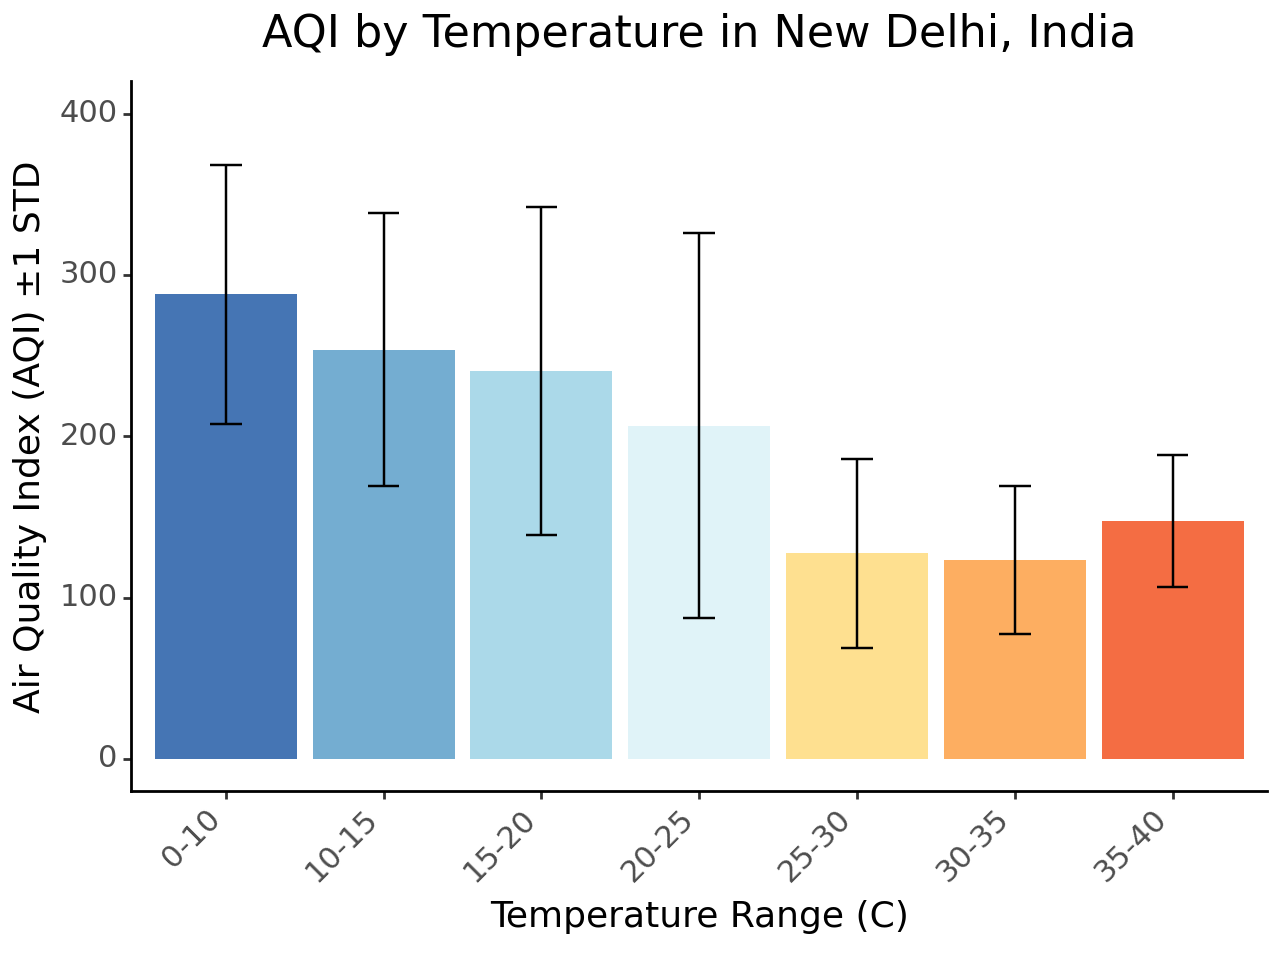

In [66]:
BarChart = (ggplot(df_buckets, aes(x='temp_bins', y='MeanAQI', fill='temp_bins')) +
            geom_bar(stat='identity', show_legend=False)+
            geom_errorbar(aes(ymin='MeanAQI-StdDevAQI', ymax='MeanAQI+StdDevAQI'), width=0.2)+
            scale_fill_manual(values=['#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#fee090', '#fdae61', '#f46d43'])+
            ggtitle("AQI by Temperature in New Delhi, India")+
            xlab("Temperature Range (C)")+
            ylab("Air Quality Index (AQI) ±1 STD")+
            ylim(0,400) +
            scale_x_discrete(labels=['0-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']) +
            theme_classic() +
            theme(text=element_text(size=12),
              axis_text_x=element_text(angle=45, hjust=1, size=11),
              axis_text_y=element_text(size=11),
              plot_title=element_text(size=16, ha='center'),
              axis_title=element_text(size=13))
            )

print(BarChart)

* *There seems to be a negative association between air temperature and AQI value in New Delhi. Air quality is worse in cooler temperatures, which checks out with my interpretation of the time series plot above. The cooler Winter months in New Delhi experience worse air quality.*

In [67]:
# Min-max normalization of AQI and TAVG so they can be compared on one plot

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_scale = ['TAVG', 'AQI']

df_merge[columns_to_scale] = scaler.fit_transform(df_merge[columns_to_scale])

In [68]:
# Melt the AQI and TAVG data long

df_temp_aqi_long = df_merge.melt(id_vars=['Year', 'Month', 'Day', 'Date'],
                    value_vars=['TAVG', 'AQI']
                    )

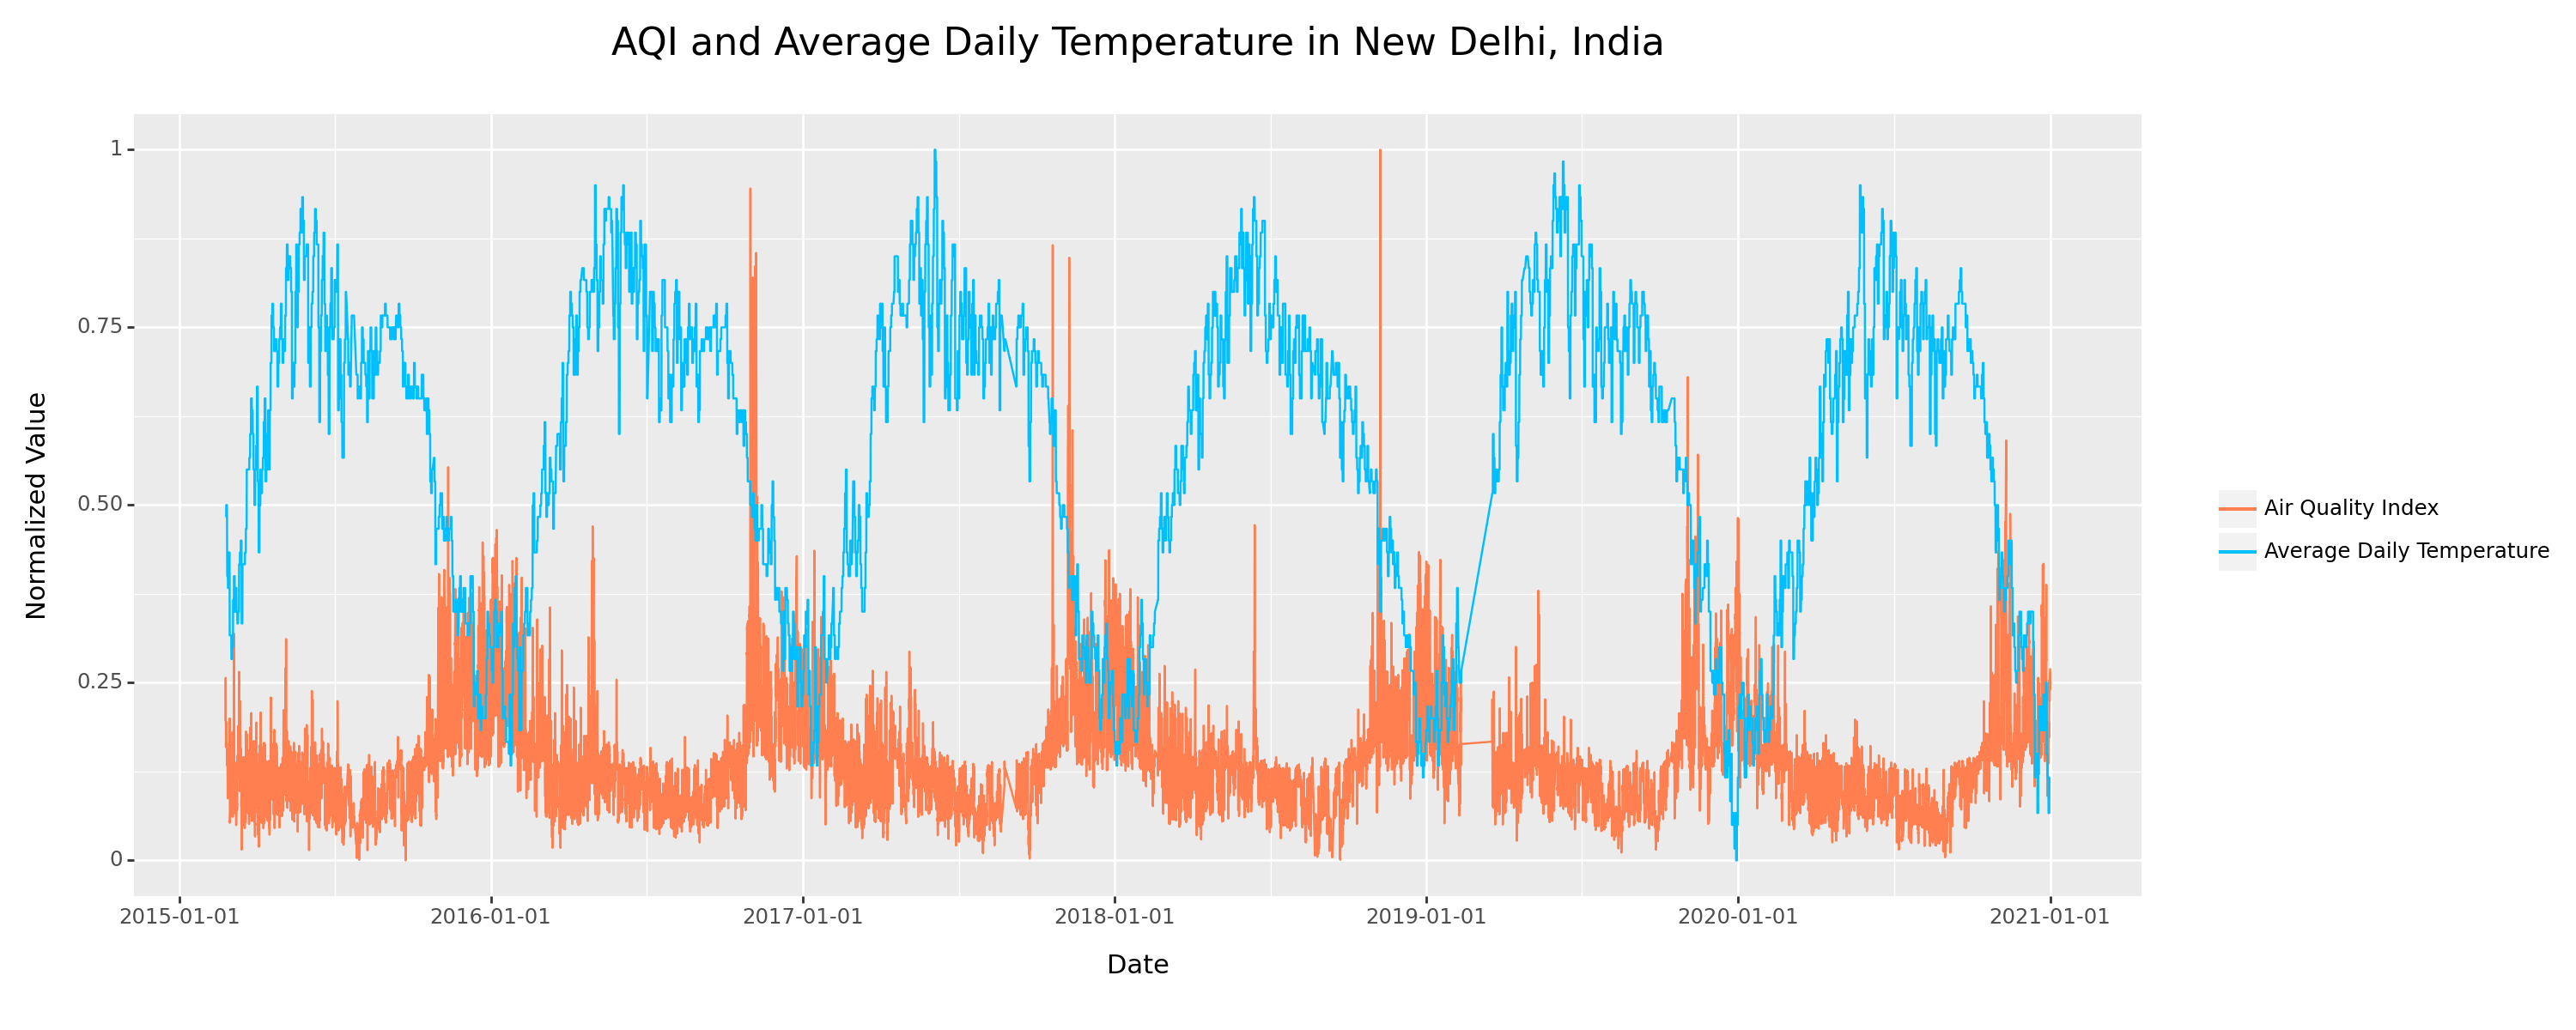

<Figure Size: (1500 x 600)>

In [69]:
lineplotComparison = (
                      ggplot(df_temp_aqi_long, aes(x='Date', y='value',  color='variable')) +
                      geom_line() +
                      ggtitle('AQI and Average Daily Temperature in New Delhi, India')+
                      ylab('Normalized Value') +
                      theme(figure_size = (15, 6),
                            plot_title=element_text(size=16, ha='center')) +
                      scale_color_manual(values={'TAVG': '#00BFFF', 'AQI': '#FF7F50'},
                                        labels={'TAVG': 'Average Daily Temperature', 'AQI': 'Air Quality Index'}) +
                      labs(color='')
                      )

lineplotComparison